<a href="https://colab.research.google.com/github/SHplusR/MAI_Graph/blob/main/graph_mai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# word cloud **연습**

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 465 kB 57.8 MB/s 


In [ ]:
import pickle
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

In [ ]:
pwd

'/content'

In [ ]:
#loaded_model = load_model('review_model')
loaded_model = load_model('/content/graph_model.h5')

In [ ]:
okt = Okt()
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다','로','것','고','원']
max_len = 50

In [ ]:
with open('tokenizer.pickle','rb') as handle:
  tokenizer = pickle.load(handle)

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  print(new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True)
  print(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  print(new_sentence)
  encoded = tokenizer.texts_to_sequences([new_sentence])
  print(encoded)
  pad_new = pad_sequences(encoded, maxlen = max_len)
  print(pad_new)
  score = float(loaded_model.predict(pad_new))
  print(score)
  if(score >= 0.8):
    print("{:.2f}% 확률로 5점 리뷰입니다.\n".format(score * 100))
  elif (0.8 >score > 0.6):
    print("{:.2f}% 확률로 4점 리뷰입니다.\n".format(score * 100))
  elif (0.6 >score > 0.4):
    print("{:.2f}% 확률로 3점 리뷰입니다.\n".format((1 - score) * 100))
  elif (0.4 >score > 0.2):
    print("{:.2f}% 확률로 2점 리뷰입니다.\n".format((1 - score) * 100))
  else :
    print("{:.2f}% 확률로 1점 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('더럽고 최악. 불편함. 그리고 직원들 싸가지없음.')

더럽고 최악 불편함 그리고 직원들 싸가지없음
['더럽다', '최악', '불편하다', '그리고', '직원', '들', '싸가지', '없다']
['더럽다', '최악', '불편하다', '그리고', '직원', '싸가지', '없다']
[[417, 120, 199, 107, 12, 337, 4]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 417 120 199 107  12 337   4]]
1/1 [==============================] - 1s 640ms/step
0.0008406902779825032
99.92% 확률로 1점 리뷰입니다.



In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import re
from konlpy.tag import Okt

In [ ]:
print(len(['예전 남자분이랑 미들 분들은 착한데 저녁 시간대 여자분은 일이 하기 싫으신건지 불친절하네요','점심에 커피 먹으러 갔는데 엄청 친절하셔서 기분이 좋더라고요!! 여쭤보니까 사장님이 바뀌셨더라고요. 점심먹고 기분좋게 오후 업무 시작했습니다. 이젠 자주 갈려고요!!','정말 이렇게 불친절한곳 처음이네요인사는커녕 커피값을 지불해도 대꾸도하지않고 테크아웃시 커피만 데스크에덜렁놓고 가지고가든지 말든지 말도없고갈때도 인사는 아예 실종입니다이렇게 불친절해서 어디 요즘같은불경기때 성공 할수있겠습니까 매장방문두번하는데 두번 똑같네요마이너스 200입니다']))

3


In [ ]:
def word_cloud_maker(new_sentence):
  # word_cloud = []
  # word_cloud.apply(okt.nouns(new_sentence))
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True)
  print(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  print(new_sentence)

  noun_list=Counter(new_sentence)
  wc = WordCloud(
      font_path = '/content/DalseoDarling.ttf',
      background_color = "white", \
      width=1000, \
      height=1000, \
      max_words=100, \
      max_font_size=300)
  wc.generate_from_frequencies(dict(noun_list))
  wc.to_file('wordcloud_mai.png')

In [ ]:
word_cloud_maker('정말 이렇게 불친절한곳 처음이네요인사는커녕 커피값을 지불해도 대꾸도하지않고 테크아웃시 커피만 데스크에덜렁놓고 가지고가든지 말든지 말도없고갈때도 인사는 아예 실종입니다이렇게 불친절해서 어디 요즘같은불경기때 성공 할수있겠습니까 매장방문두번하는데 두번 똑같네요마이너스 200입니다')

['정말', '이렇게', '불친절하다', '곳', '처음', '이네', '요', '인사', '는커녕', '커피', '값', '을', '지불', '하다', '대꾸', '도하', '지', '않다', '테크', '아웃', '시', '커피', '만', '데스크', '에', '덜렁', '놓다', '가다', '말', '든지', '말', '도', '없다', '고갈', '때', '도', '인사', '는', '아예', '실종', '이다', '이렇게', '불친절하다', '어디', '요즘', '같다', '불경기', '때', '성공', '하다', '매장', '방문', '두', '번하다', '두', '번', '똑같다', '마이너스', '이다']
['정말', '이렇게', '불친절하다', '곳', '처음', '이네', '요', '인사', '는커녕', '커피', '값', '을', '지불', '대꾸', '도하', '지', '않다', '테크', '아웃', '시', '커피', '만', '데스크', '덜렁', '놓다', '가다', '말', '든지', '말', '없다', '고갈', '때', '인사', '아예', '실종', '이다', '이렇게', '불친절하다', '어디', '요즘', '같다', '불경기', '때', '성공', '매장', '방문', '두', '번하다', '두', '번', '똑같다', '마이너스', '이다']


# ---- json 만들기!! ------ 22.11**.22**

In [ ]:
pwd

'/content'

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 465 kB 60.2 MB/s 


In [ ]:
import json

In [ ]:
file_path = "/content/json_word_mode.json"
with open(file_path, 'r', encoding='UTF-8') as file:

    data = json.load(file)

In [ ]:
data_len = len(data)
print(data_len)

13660


In [ ]:
for i in range(0,data_len):
  del(data[i]['placeName'],data[i]['placeAddress'],data[i]['placeX'],data[i]['placeY'],data[i]['placeTotalReview'],data[i]['placeReviewStar'],data[i]['placeKeyword'])

In [ ]:
data[0]

{'no': '377628885',
 'placeReviews': ['점심에 커피 먹으러 갔는데 엄청 친절하셔서 기분이 좋더라고요!! 여쭤보니까 사장님이 바뀌셨더라고요. 점심먹고 기분좋게 오후 업무 시작했습니다. 이젠 자주 갈려고요!!',
  '예전 남자분이랑 미들 분들은 착한데 저녁 시간대 여자분은 일이 하기 싫으신건지 불친절하네요',
  '정말 이렇게 불친절한곳 처음이네요인사는커녕 커피값을 지불해도 대꾸도하지않고 테크아웃시 커피만 데스크에덜렁놓고 가지고가든지 말든지 말도없고갈때도 인사는 아예 실종입니다이렇게 불친절해서 어디 요즘같은불경기때 성공 할수있겠습니까 매장방문두번하는데 두번 똑같네요마이너스 200입니다']}

In [ ]:
from konlpy.tag import Okt
import re
from collections import Counter

In [ ]:
okt = Okt()
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다','로','것','고','원','그리고','분','님','년','놈','심','만']

In [ ]:
# ['더럽다', '최악', '불편하다', '그리고', '직원', '싸가지', '없다']
def review_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True)
  #new_sentence = okt.pos(new_sentence, stem=True)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  return new_sentence

In [ ]:
type(data[0]['placeReviews'])

list

In [ ]:
review_predict('음식은 맛있었지만 조금 가격대가 있고, 먹다가 머리카락이 나와서...주방에 요리하시는 분들 모자 쓰셨으면 좋겠습니다...음식이 맛있어서 재방문 의사는 있습니다..')

[('음식', 'Noun'),
 ('은', 'Josa'),
 ('맛있다', 'Adjective'),
 ('조금', 'Noun'),
 ('가격', 'Noun'),
 ('대가', 'Noun'),
 ('있다', 'Adjective'),
 ('먹다', 'Verb'),
 ('머리카락', 'Noun'),
 ('이', 'Josa'),
 ('나오다', 'Verb'),
 ('주방', 'Noun'),
 ('에', 'Josa'),
 ('요리', 'Noun'),
 ('하다', 'Verb'),
 ('분들', 'Suffix'),
 ('모자', 'Noun'),
 ('쓸다', 'Verb'),
 ('좋다', 'Adjective'),
 ('음식', 'Noun'),
 ('이', 'Josa'),
 ('맛있다', 'Adjective'),
 ('재', 'Noun'),
 ('방문', 'Noun'),
 ('의사', 'Noun'),
 ('는', 'Josa'),
 ('있다', 'Adjective')]

In [ ]:

# count = Counter(review_predict(data[0]['placeReviews'][2]))
# print(count)
# words = (dict(count.most_common()))
# print(words)
for i in range(0,data_len):
   review_list = []
   review_len = len(data[i]['placeReviews'])

   for j in range(0,review_len):
     review=data[i]['placeReviews'][j]
     review_list.extend(review_predict(review))

   count = Counter(review_list)
   words = (dict(count.most_common()))
   data[i]['word_count'] = words

In [ ]:
print(data[0])
data_len = len(data)
print(data_len)
for i in range(0,data_len):
  del(data[i]['placeReviews'])
print(data[0])

{'no': '377628885', 'placeReviews': ['점심에 커피 먹으러 갔는데 엄청 친절하셔서 기분이 좋더라고요!! 여쭤보니까 사장님이 바뀌셨더라고요. 점심먹고 기분좋게 오후 업무 시작했습니다. 이젠 자주 갈려고요!!', '예전 남자분이랑 미들 분들은 착한데 저녁 시간대 여자분은 일이 하기 싫으신건지 불친절하네요', '정말 이렇게 불친절한곳 처음이네요인사는커녕 커피값을 지불해도 대꾸도하지않고 테크아웃시 커피만 데스크에덜렁놓고 가지고가든지 말든지 말도없고갈때도 인사는 아예 실종입니다이렇게 불친절해서 어디 요즘같은불경기때 성공 할수있겠습니까 매장방문두번하는데 두번 똑같네요마이너스 200입니다'], 'word_count': {'커피': 3, '불친절하다': 3, '점심': 2, '먹다': 2, '가다': 2, '기분': 2, '좋다': 2, '지': 2, '이렇게': 2, '인사': 2, '말': 2, '때': 2, '이다': 2, '두': 2, '엄청': 1, '친절하다': 1, '여쭈다': 1, '보': 1, '니까': 1, '사장': 1, '바뀌다': 1, '오후': 1, '업무': 1, '시작': 1, '젠': 1, '자주': 1, '갈리다': 1, '예전': 1, '남자': 1, '이랑': 1, '밉다': 1, '들다': 1, '착하다': 1, '저녁': 1, '시간대': 1, '여자': 1, '일이': 1, '싫다': 1, '신건': 1, '정말': 1, '곳': 1, '처음': 1, '이네': 1, '요': 1, '는커녕': 1, '값': 1, '을': 1, '지불': 1, '대꾸': 1, '도하': 1, '않다': 1, '테크': 1, '아웃': 1, '시': 1, '데스크': 1, '덜렁': 1, '놓다': 1, '든지': 1, '없다': 1, '고갈': 1, '아예': 1, '실종': 1, '어디': 1, '요즘': 1, '같다': 1, '불경기': 1, '성공': 1, '매장': 1, '방문': 1, '번하다': 1, '번': 1

In [ ]:
print(data[0])

{'no': '377628885', 'word_count': {'커피': 3, '불친절하다': 3, '점심': 2, '먹다': 2, '가다': 2, '기분': 2, '좋다': 2, '지': 2, '이렇게': 2, '인사': 2, '말': 2, '때': 2, '이다': 2, '두': 2, '엄청': 1, '친절하다': 1, '여쭈다': 1, '보': 1, '니까': 1, '사장': 1, '바뀌다': 1, '오후': 1, '업무': 1, '시작': 1, '젠': 1, '자주': 1, '갈리다': 1, '예전': 1, '남자': 1, '이랑': 1, '밉다': 1, '들다': 1, '착하다': 1, '저녁': 1, '시간대': 1, '여자': 1, '일이': 1, '싫다': 1, '신건': 1, '정말': 1, '곳': 1, '처음': 1, '이네': 1, '요': 1, '는커녕': 1, '값': 1, '을': 1, '지불': 1, '대꾸': 1, '도하': 1, '않다': 1, '테크': 1, '아웃': 1, '시': 1, '데스크': 1, '덜렁': 1, '놓다': 1, '든지': 1, '없다': 1, '고갈': 1, '아예': 1, '실종': 1, '어디': 1, '요즘': 1, '같다': 1, '불경기': 1, '성공': 1, '매장': 1, '방문': 1, '번하다': 1, '번': 1, '똑같다': 1, '마이너스': 1}}


In [ ]:
with open('./mai_word_count.json', 'w') as make_file:

    json.dump(data, make_file,indent="\t")

In [ ]:
with open('./mai_word_count_utf.json', 'w') as make_file:

    json.dump(data, make_file, ensure_ascii=False, indent="\t")

# **_______________image생성 -----------------------22.11.22 우와 날짜뭐야**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import re
import json

In [ ]:
file_path = "/content/goodplace.json"
with open(file_path, 'r', encoding='UTF-8') as file:

    count = json.load(file)

In [ ]:
count_len = len(count)
print(count_len)

6586


In [ ]:
print(  count[0]['placeWordCount'])
print(type(  count[0]['placeWordCount']))

{'맛': 4, '자다': 3, '가성': 3, '비': 3, '다른': 2, '않다': 2, '데': 2, '이고': 2, '먹다': 2, '핵': 2, '별로': 2, '네이버': 2, '예약': 2, '가다': 2, 'ㅎ': 2, '오다': 2, '친절하다': 2, '맛있다': 2, '아니다': 2, '서비스': 2, '좋다': 2, '가보다': 2, '을': 2, '바닷가재': 1, '싱싱하다': 1, '있다': 1, '사이드': 1, '어울리다': 1, '볶음밥': 1, '기르다': 1, '딱딱하다': 1, '랑': 1, '비교': 1, '해보다': 1, '여기': 1, '신선도': 1, '최고': 1, '인': 1, '듯': 1, '가격': 1, '이야': 1, '어차피': 1, '싯가': 1, '킹크랩': 1, '랍스터': 1, '따지다': 1, '부터가': 1, '모르다': 1, '생각': 1, '성비': 1, '구인': 1, '다': 1, '하': 1, '면': 1, '프로': 1, '할인': 1, '해주다': 1, '저녁': 1, '메뉴': 1, '한정임': 1, '에는': 1, '써다': 1, '회사': 1, '분들': 1, '께': 1, '절대': 1, '비추다': 1, '곳': 1, '너무': 1, '비싸다': 1, '먼저': 1, '분': 1, '덕분': 1, '인지': 1, '직원': 1, 'ㅎㅅㅎ': 1, '대게': 1, '게': 1, '딱': 1, '지': 1, '비빔밥': 1, '점원': 1, '어림': 1, '에도': 1, '한데': 1, '그릇': 1, '떨어뜨리다': 1, '많다': 1, '괜찮다': 1, '평점': 1, '구강': 1, '추다': 1, '최악': 1, '세번': 1, '동네': 1, '에이만': 1, '크랩': 1, '집': 1, '없다': 1, '판단': 1, '하고': 1, '참고': 1, '그닥': 1, '결정': 1, '적': 1, '개': 1, '뭐': 1, '같다': 1, '어디': 1, '알바

In [ ]:
print(count[2]['placeWordCount'])

{'짬뽕': 12, '먹다': 12, '탕수육': 9, '맛': 9, '량': 8, '없다': 8, '을': 7, '많다': 6, '면': 6, '탕슉': 5, '짜장': 5, '일단': 4, '있다': 4, '보다': 4, '인데': 4, '아니다': 4, '짜장면': 4, '맛있다': 4, '내': 4, '안': 4, '하나': 4, '시간': 3, '지금': 3, '에서': 3, '같다': 3, '두껍다': 3, '남다': 3, '진심': 3, '이다': 3, '무슨': 3, '괜찮다': 3, '맛집': 3, '제': 2, '주차장': 2, '수': 2, '곳': 2, '좋다': 2, '타임': 2, '데': 2, '근데': 2, '중': 2, '시키다': 2, '여기다': 2, '정도': 2, '왜': 2, '요': 2, '않다': 2, '정말': 2, '소스': 2, '여기': 2, '불맛': 2, '오다': 2, '에는': 2, '맛없다': 2, '음식': 2, '주다': 2, '국물': 2, '인': 2, '줄': 2, '알다': 2, '주문': 2, '남기다': 2, '장사': 2, '별': 2, '단무지': 2, '임': 2, '쏘다': 2, '하고': 2, '졸라': 2, '워낙': 1, '단독': 1, '건물': 1, '식당': 1, '늦다': 1, '갈다': 1, '좋아하다': 1, '조건': 1, '딱': 1, '맞다': 1, '솔직하다': 1, '체인점': 1, '궁금하다': 1, '가보다': 1, '뭐': 1, '이리': 1, '까지': 1, '중식': 1, '당': 1, '압도': 1, '적': 1, '사진': 1, '저건': 1, '짜다': 1, '곱': 1, '이랑': 1, '소자': 1, '평소': 1, '중국집': 1, '저렇게': 1, '적다': 1, '거': 1, '후회되다': 1, '칼국수': 1, '인분': 1, '나누다': 1, '그릇': 1, '주시': 1, '건가': 1, '그리고': 1, '우동': 1, '쓸다

In [ ]:
# 연습용
wc = WordCloud(
    font_path = '/content/DalseoDarling.otf',
    background_color = "white", \
    width=1000, \
    height=1000, \
    max_words=100, \
    max_font_size=300)

wc.generate_from_frequencies(count[0]['placeWordCount'])

wc.to_file('/content/word_cloud/%s.png' % count[0]['no'])

In [ ]:
wc = WordCloud(
    font_path = '/content/DalseoDarling.ttf',
    background_color = "white", \
    width=1000, \
    height=1000, \
    max_words=100, \
    max_font_size=300)

for i in range(0,count_len):
  if i % 100 == 0:
    print(i)
  if len(count[i]['placeWordCount']) != 0:
    wc.generate_from_frequencies(count[i]['placeWordCount'])
    wc.to_file('/content/word_cloud_goodplace/%s.png' % count[i]['no'])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500


In [ ]:
!zip -r /content/word_cloud_goodplace.zip /content/word_cloud_goodplace

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  adding: content/word_cloud_goodplace/27403916.png (deflated 0%)
  adding: content/word_cloud_goodplace/10387683.png (deflated 0%)
  adding: content/word_cloud_goodplace/271587133.png (deflated 0%)
  adding: content/word_cloud_goodplace/772655535.png (deflated 0%)
  adding: content/word_cloud_goodplace/24528814.png (deflated 0%)
  adding: content/word_cloud_goodplace/1393296142.png (deflated 0%)
  adding: content/word_cloud_goodplace/16448438.png (deflated 0%)
  adding: content/word_cloud_goodplace/1536002539.png (deflated 0%)
  adding: content/word_cloud_goodplace/8507513.png (deflated 0%)
  adding: content/word_cloud_goodplace/24284857.png (deflated 0%)
  adding: content/word_cloud_goodplace/1911533343.png (deflated 1%)
  adding: content/word_cloud_goodplace/795760330.png (deflated 0%)
  adding: content/word_cloud_goodplace/1529973914.png (deflated 0%)
  adding: content/word_cloud_goodplace/15941125.png (deflated 0%)
  adding: content/word_cloud_g

# **그래프 만들기 -- 221130**

In [ ]:
import matplotlib.pyplot as plt
import json
import matplotlib.font_manager as fm
import matplotlib

In [ ]:
file_path = "/content/mai_word_count_2.json"
with open(file_path, 'r', encoding='UTF-8') as file:

    data = json.load(file)

In [ ]:
print(data[2622]['word_count'])
print(type(data[2622]['word_count']))

{'커피': 20, '맛있다': 13, '좋다': 12, '친절하다': 8, '있다': 7, '자리': 6, '공간': 5, '너무': 5, '곳': 4, '넓다': 4, '아쉽다': 4, '수': 4, '없다': 4, '많다': 4, '직원': 4, '분들': 4, '않다': 4, '용산역': 3, '때': 3, '카페': 3, '맛': 3, '다': 3, '디저트': 3, '두': 3, '이다': 3, '테이블': 3, '간격': 3, '아메리카노': 3, '분위기': 3, '무난': 2, '아니다': 2, '적': 2, '되다': 2, '사람': 2, '들리다': 2, '인테리어': 2, '제': 2, '시키다': 2, '을': 2, '자다': 2, '같다': 2, '안내': 2, '해': 2, '메뉴': 2, '제한': 2, '없이': 2, '이용': 2, '바닐라': 2, '라떼': 2, '피낭': 2, '시': 2, '향': 2, '블렌드': 2, '설명': 2, '까눌레': 2, '예쁘다': 2, '시끄럽다': 2, '맛집': 2, '함': 2, '쏘다': 2, '빵': 2, '진짜': 2, '불편하다': 2, '보다': 2, '요': 2, '시간': 2, '산미': 2, '매장': 2, '손님': 1, '버리다': 1, 'ㅅㅌㅊ': 1, '딱': 1, '적당하다': 1, '시원하다': 1, '굳이': 1, '찾아가다': 1, '전체': 1, '절제': 1, '서비스': 1, '마인드': 1, '다소': 1, '베이커리': 1, '위치': 1, '다르다': 1, 'ㅋㅋ': 1, '어쩔': 1, '한강대로': 1, '길': 1, '핫플': 1, '인': 1, '만큼': 1, '말투': 1, '일단': 1, '바쁘다': 1, '조금': 1, '예민하다': 1, '자기': 1, '모르다': 1, '툭': 1, '내뱉다': 1, '뭔가': 1, '여유': 1, '넘치다': 1, '심일': 1, '단': 1, '갈다': 1, '마다': 1, '예요': 1,

Text(0.3, 0.3, '한글')

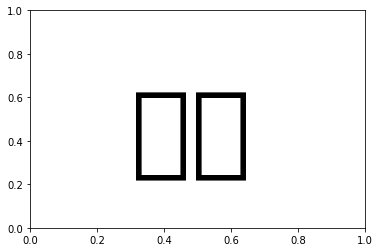

In [ ]:
plt.rc('axes', unicode_minus=False)
plt.text(0.3, 0.3, '한글', size=100)

# test

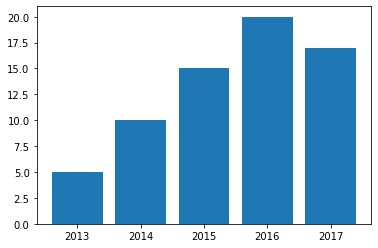

In [ ]:
import matplotlib.pyplot as plt

years = [2013, 2014, 2015, 2016, 2017]
temperatures = [5, 10, 15, 20, 17]
pos = range(len(years))  # [0, 1, 2, 3, 4]

plt.bar(pos, temperatures, align='center')
# x값에 0부터 시작하는 정수 리스트로 넣어줘야 하므로 x 리스트의 길이를 range로 잡아서 넣는다.
# y값은 온도, align='center' 각 막대를 가운데 정렬

plt.xticks(pos, years)  # 각 막대에 해당하는 연도 표기

plt.show()  # 그래프 그린다.

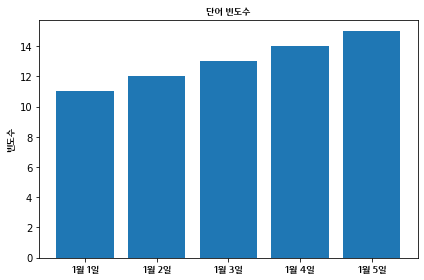

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

dates = ["1월 {}일".format(day) for day in range(1, 6)]  # 날짜 세팅
temperatures = list(range(11, 16))  # 온도 세팅

pos = range(len(dates))  # 막대 그래프의 막대 위치를 결정

font = fm.FontProperties(fname='DalseoDarling.ttf')  # matplotlib에 한국어 폰트가 없기 때문에 그래프에 한국어가 들어간다면 한국어 폰트를 설정해줘야 한다.

plt.bar(pos, temperatures, align='center')  # 막대의 높이가 빈도의 값이 되도록 설정
plt.xticks(pos, dates, rotation='horizontal', fontproperties=font)  # x축 라벨의 이름이 길어서 'vertical' 세로로 돌려줌
plt.title('단어 빈도수', fontproperties=font)  # 그래프 제목 설정
plt.ylabel('빈도수', fontproperties=font)  # y축에 설명 추가

plt.tight_layout()  # 라벨 이름이 잘리지 않게 여백 조정
plt.show()

# 그래프 만들기 최종본

만족해~


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import json
import pandas as pd

In [ ]:
file_path = "/content/mai_word_count_2.json"
with open(file_path, 'r', encoding='UTF-8') as file:

    data = json.load(file)

['커피', '불친절하다', '점심', '먹다', '가다']
[3, 3, 2, 2, 2]


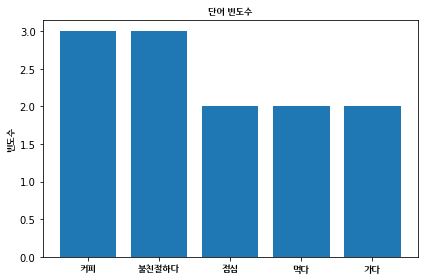

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

word = []
count = []
for key,val in data[0]['word_count'].items():
  word.append(key)
  count.append(val)
word = word[:5]
count = count[:5]
print(word)
print(count)

pos = range(len(word))  # 막대 그래프의 막대 위치를 결정

font = fm.FontProperties(fname='DalseoDarling.ttf')  # 한국어 포트 설정

plt.bar(pos, count, align='center')  # 막대의 높이가 빈도의 값이 되도록 설정
plt.xticks(pos, word, rotation='horizontal', fontproperties=font)
plt.title('단어 빈도수', fontproperties=font)  # 그래프 제목 설정
plt.ylabel('빈도수', fontproperties=font)  # y축에 설명 추가

plt.tight_layout()  # 라벨 이름이 잘리지 않게 여백 조정
plt.show()